# Инжиниринг категориальных признаков

# Содержание работы


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Загрузите прилагаемые к этой работе два датасета - Титаник и Customer support. Выведите основную информацию по каждому датасету и сделайте выводы.

In [3]:
CS_data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML5.3%20categorical%20features/data/Customer_support_data.csv")
T_data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML5.3%20categorical%20features/data/titanic.csv", index_col=0)

In [4]:
CS_data.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [5]:
CS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28756 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [6]:
CS_data.describe(include="all")

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
count,85907,85907,85907,85907,28756,67675,17214,85907,85907,85907,17079,17196,17206.000000,242.000000,85907,85907,85907,85907,85907,85907.000000
unique,85907,3,12,57,18232,67675,13766,30923,30262,31,1782,9,NaN,NaN,1371,40,6,5,5,NaN
top,07c7a878-0d5a-42e0-97ef-de59abec0238,Inbound,Returns,Reverse Pickup Enquiry,Good,3230db30-f8da-4c44-8636-ec76d1d3d4f3,09/08/2023 11:55,13/08/2023 10:40,28/08/2023 00:00,28-Aug-23,HYDERABAD,Electronics,NaN,NaN,Wendy Taylor,Carter Park,John Smith,>90,Morning,NaN
freq,1,68142,44097,22389,1390,1,7,13,3378,3452,722,4706,NaN,NaN,429,4273,25261,30660,41426,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5660.774846,462.400826,NaN,NaN,NaN,NaN,NaN,4.242157
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12825.728411,246.295037,NaN,NaN,NaN,NaN,NaN,1.378903
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392.000000,293.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,979.000000,427.000000,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2699.750000,592.250000,NaN,NaN,NaN,NaN,NaN,5.000000


In [7]:
T_data.describe(exclude=[np.number])

,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,204,889
unique,3,891,2,681,147,3
top,third,"Dooley, Mr. Patrick",male,1601,B96 B98,S
freq,491,1,577,7,4,644


### 2 - 3. Визуализируйте распределение каждого категориального признака в датасете Customer support. Учитывайте количество уникальных значений. Исследуйте связь каждого признака датасета Customer support с целевой переменной. Сделайте предварительный вывод о значимости признаков.

<Axes: xlabel='channel_name', ylabel='Count'>

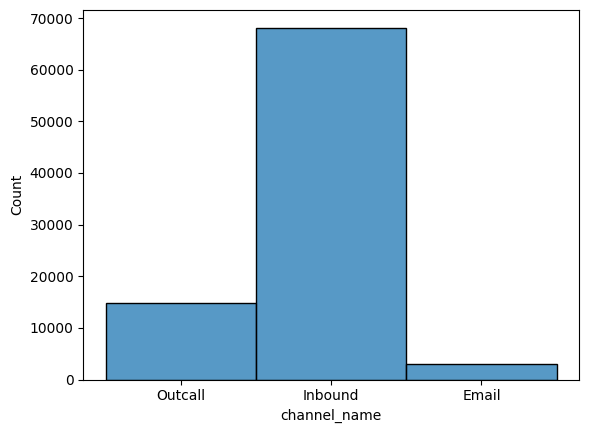

In [8]:
sns.histplot(data=CS_data, x="channel_name")

In [9]:
CS_data.channel_name.value_counts()

Inbound    68142
Outcall    14742
Email       3023
Name: channel_name, dtype: int64

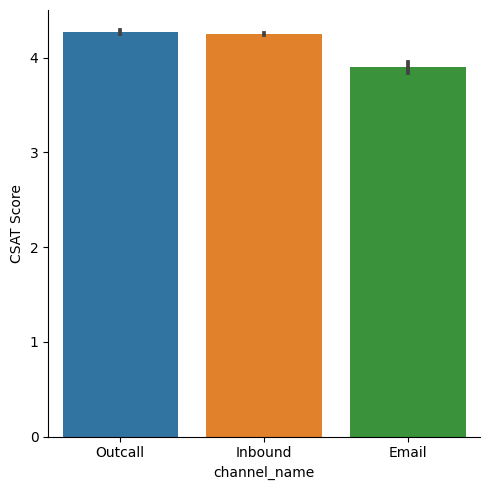

In [10]:
sns.catplot(data=CS_data, x="channel_name", y="CSAT Score", kind="bar")

In [11]:
CS_data.category.value_counts()

Returns               44097
Order Related         23215
Refund Related         4550
Product Queries        3692
Shopzilla Related      2792
Payments related       2327
Feedback               2294
Cancellation           2212
Offers & Cashback       480
Others                   99
App/website              84
Onboarding related       65
Name: category, dtype: int64

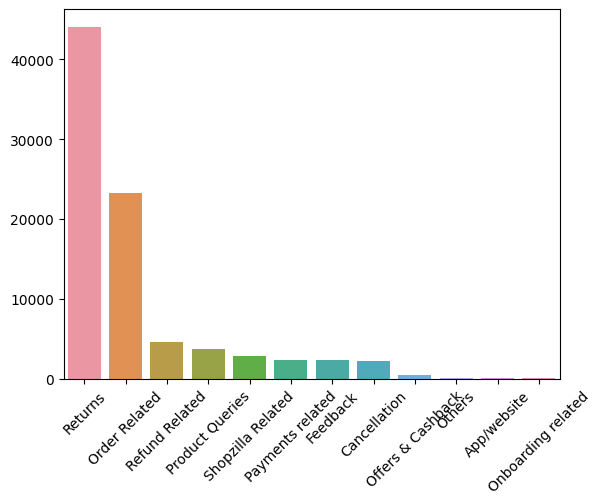

In [12]:
counts = CS_data.category.value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

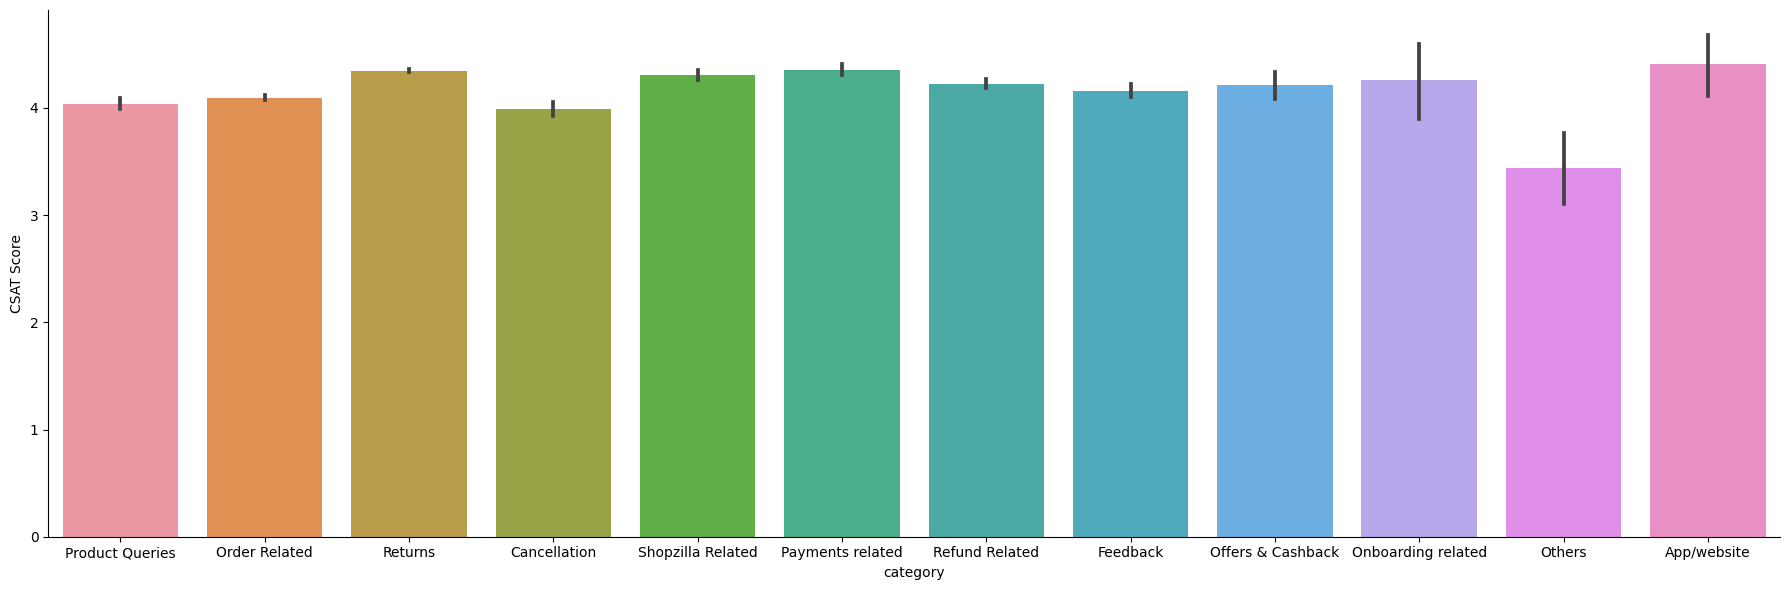

In [13]:
sns.catplot(data=CS_data, x="category", y="CSAT Score", kind="bar", height=6, aspect=3)

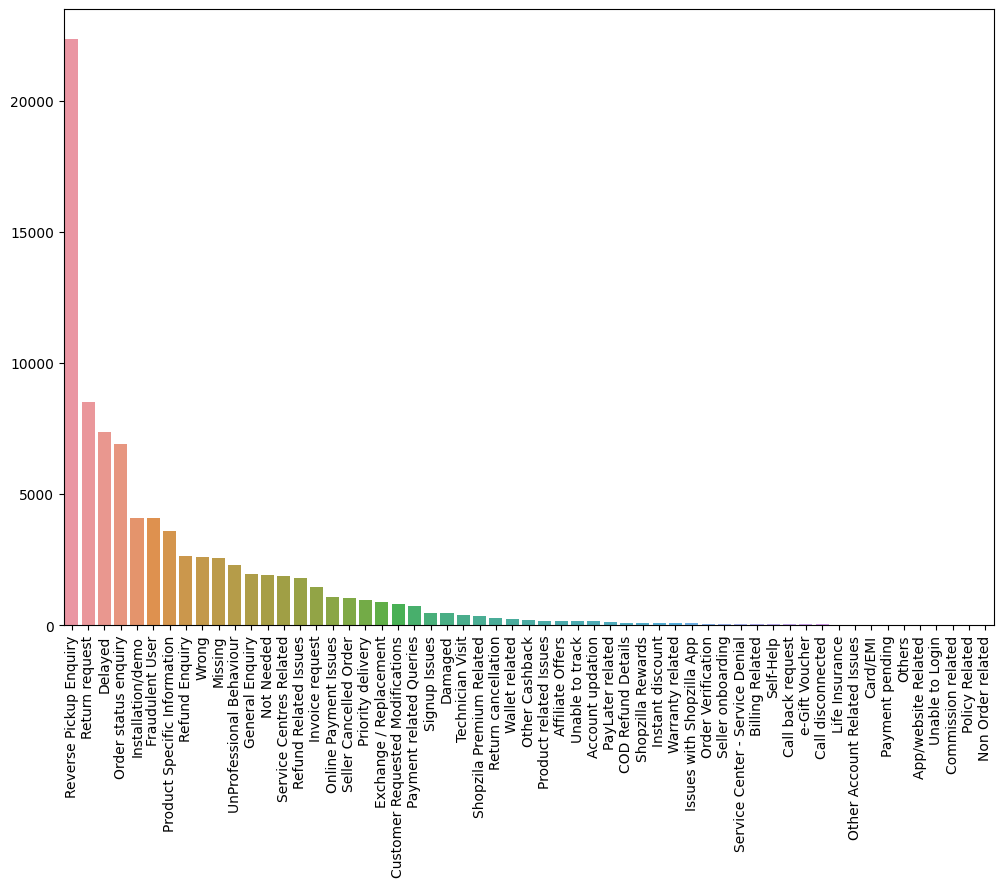

In [14]:
fig = plt.figure(figsize=(12, 8))
counts = CS_data["Sub-category"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=90)
plt.show()

In [15]:
counts[:10]

Reverse Pickup Enquiry          22389
Return request                   8523
Delayed                          7388
Order status enquiry             6922
Installation/demo                4116
Fraudulent User                  4108
Product Specific Information     3589
Refund Enquiry                   2665
Wrong                            2597
Missing                          2556
Name: Sub-category, dtype: int64

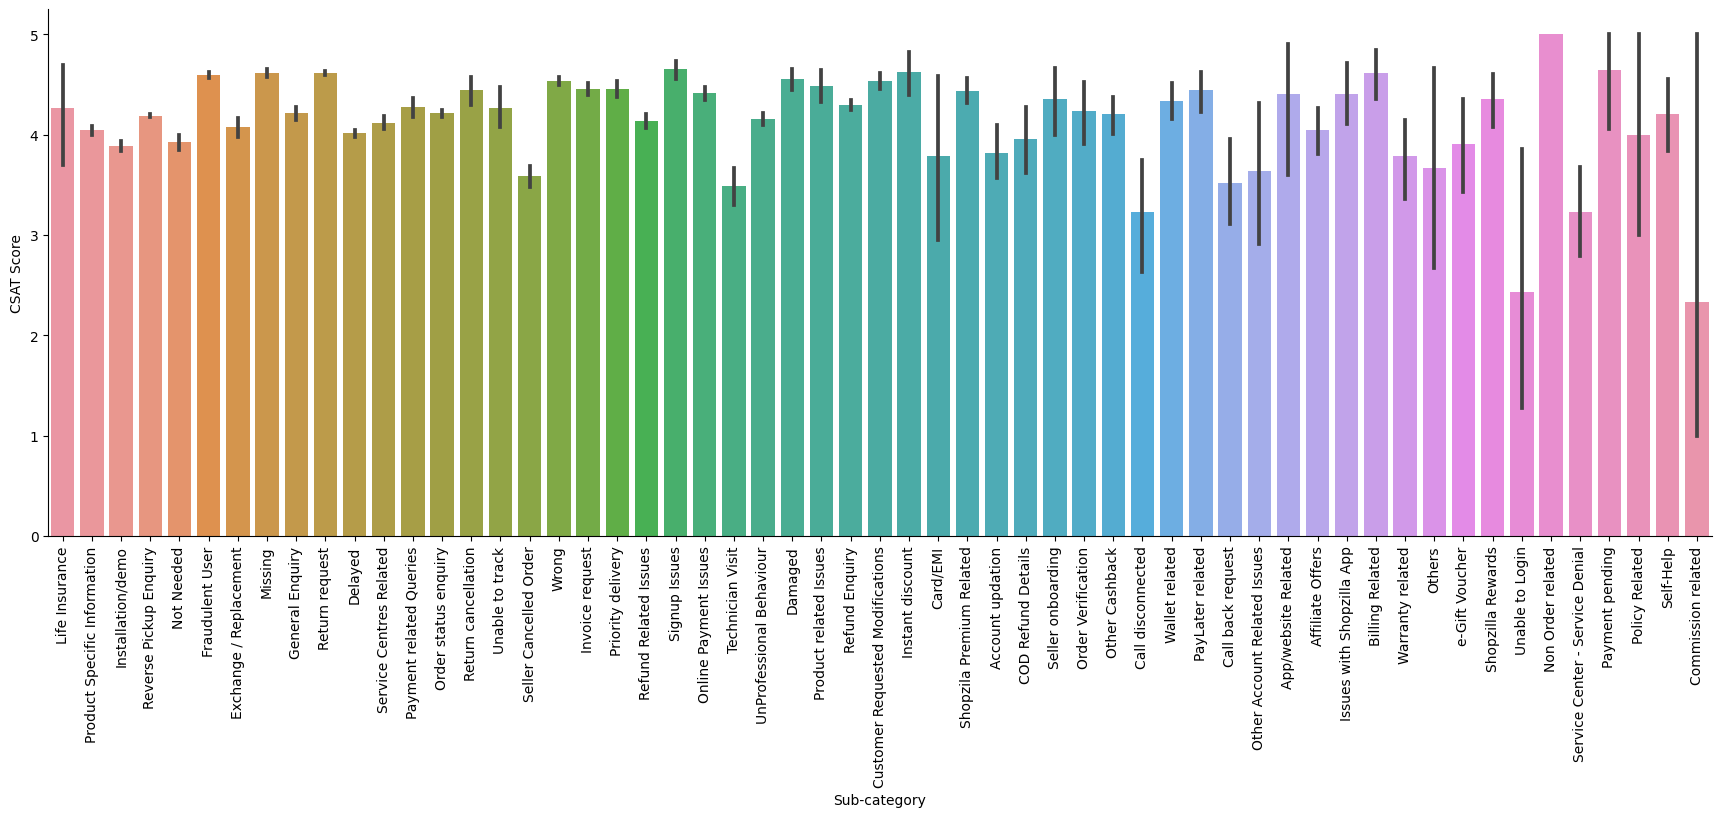

In [16]:
sns.catplot(data=CS_data, x="Sub-category", y="CSAT Score", kind="bar", height=6, aspect=3)
plt.xticks(rotation=90)
plt.show()

In [17]:
CS_data["Customer Remarks"].value_counts()[:20]

Good             1390
Good             1158
Very good         569
Nice              316
Thanks            276
Ok                259
No                258
Thank you         244
Nice              239
Very good         236
Excellent         171
Thanks            159
Good ??           148
Good service      133
Very nice         122
Thank you          97
??                 95
Nothing            88
5                  76
Good job           71
Name: Customer Remarks, dtype: int64

In [18]:
CS_data["Customer_City"].value_counts()[:20]

HYDERABAD      722
NEW DELHI      688
PUNE           435
MUMBAI         406
BANGALORE      352
CHENNAI        271
KOLKATA        270
LUCKNOW        254
AHMEDABAD      253
JAIPUR         243
GURGAON        215
PATNA          199
SURAT          175
ALLAHABAD      161
KANPUR         138
VARANASI       137
THANE          129
GHAZIABAD      120
BHUBANESWAR    117
VADODARA       105
Name: Customer_City, dtype: int64

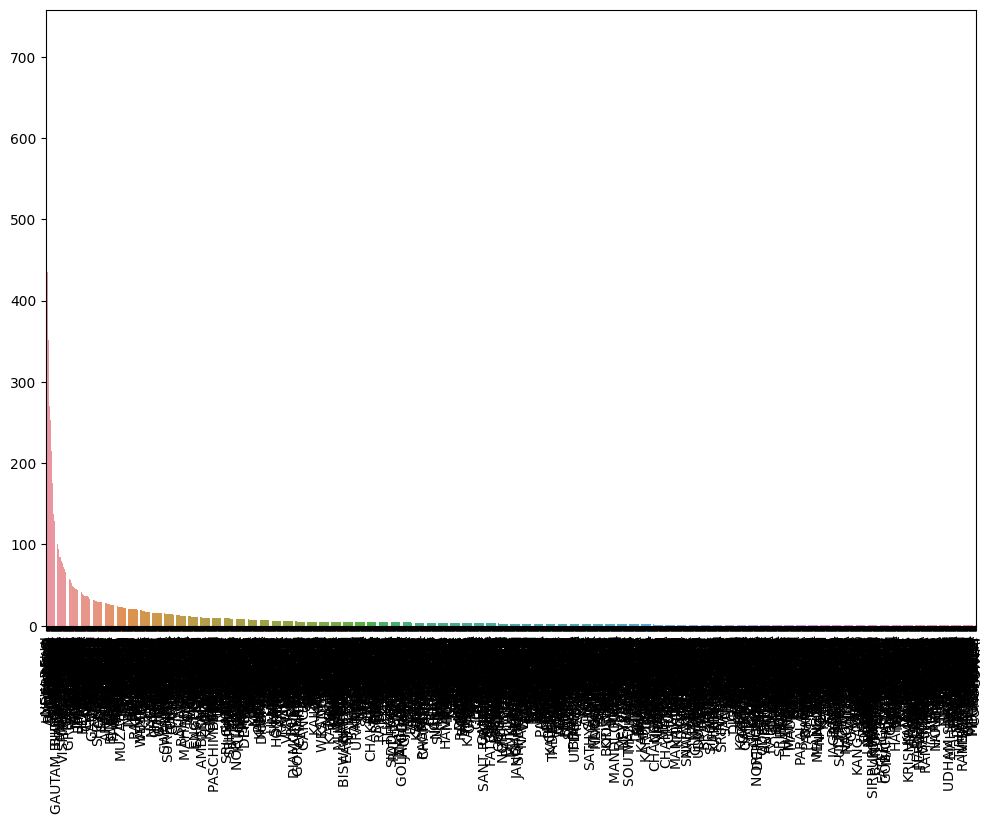

In [19]:
fig = plt.figure(figsize=(12, 8))
counts = CS_data["Customer_City"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=90)
plt.show()

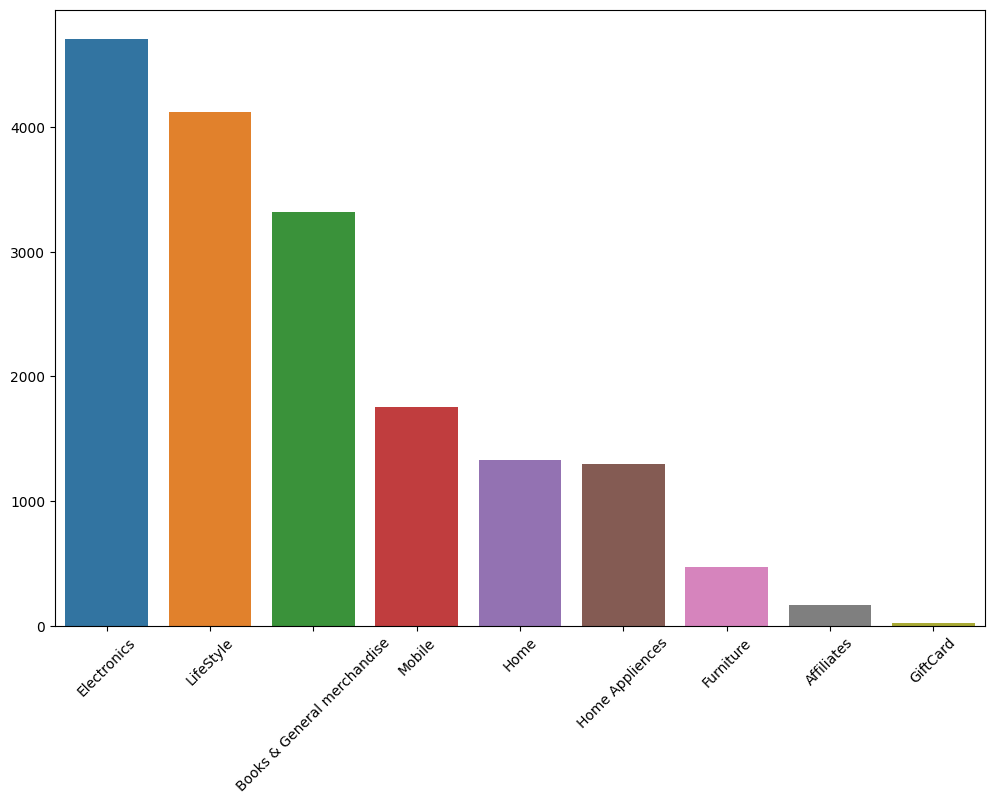

In [20]:
fig = plt.figure(figsize=(12, 8))
counts = CS_data["Product_category"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

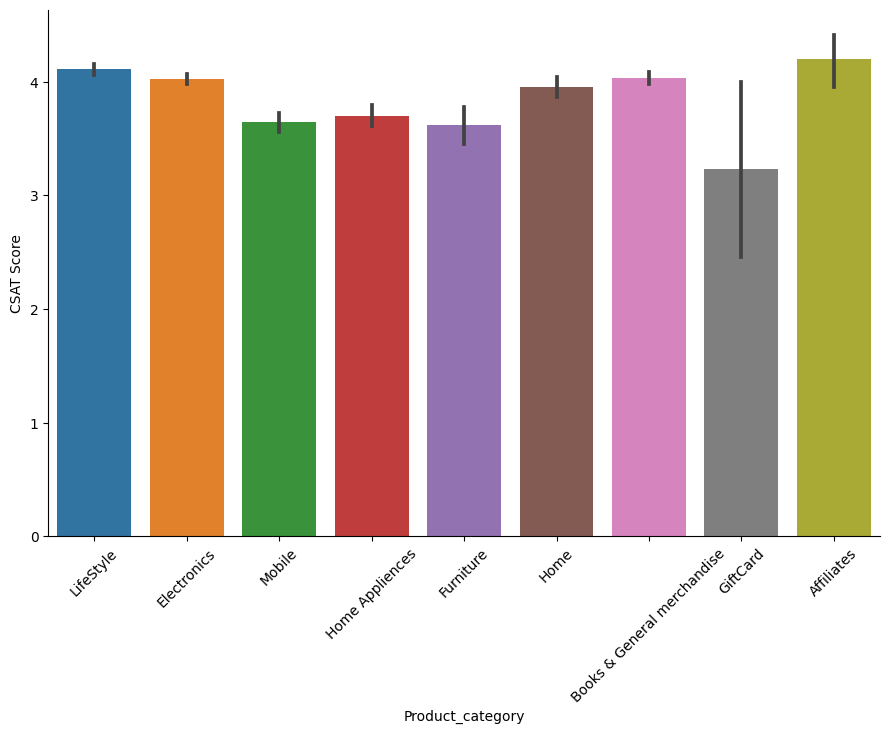

In [21]:
sns.catplot(data=CS_data, x="Product_category", y="CSAT Score", kind="bar", height=6, aspect=1.5)
plt.xticks(rotation=45)
plt.show()

In [22]:
CS_data.Agent_name.value_counts()[:20]

Wendy Taylor           429
Timothy Huff           265
David Smith            264
Jamie Smith            253
Kayla Wilson           216
Julie Williams         200
Mrs. Jennifer Stone    200
Sharon Bullock         195
Matthew White PhD      192
Tina Harrington        177
Anthony Booth          177
Rebecca Walker         176
Brianna Wolf           176
Kristin Campbell       176
Jennifer Hernandez     174
Rebecca Graham         173
William Carey DVM      169
Ryan Thompson          167
Brandon Frost          161
Brian Young            160
Name: Agent_name, dtype: int64

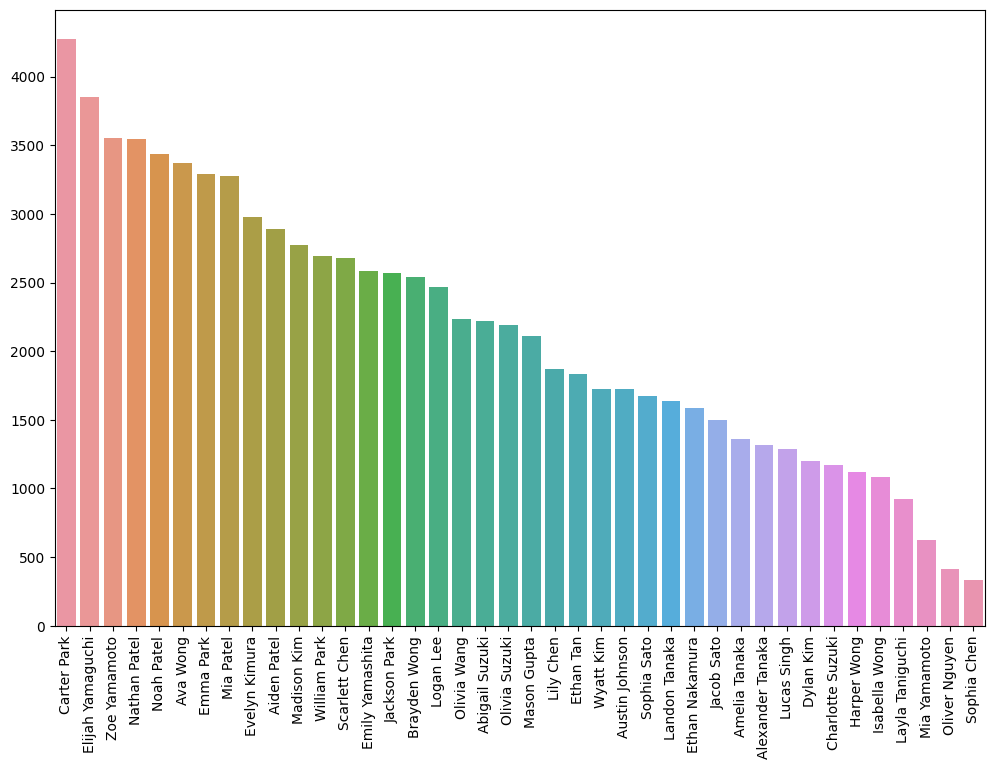

In [23]:
fig = plt.figure(figsize=(12, 8))
counts = CS_data["Supervisor"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=90)
plt.show()

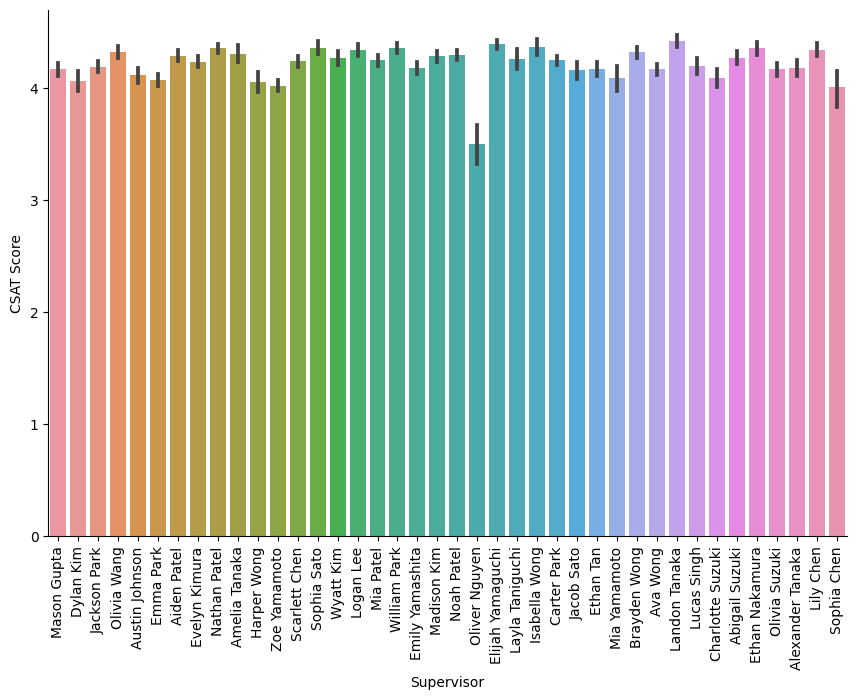

In [24]:
sns.catplot(data=CS_data, x="Supervisor", y="CSAT Score", kind="bar", height=6, aspect=1.5)
plt.xticks(rotation=90)
plt.show()

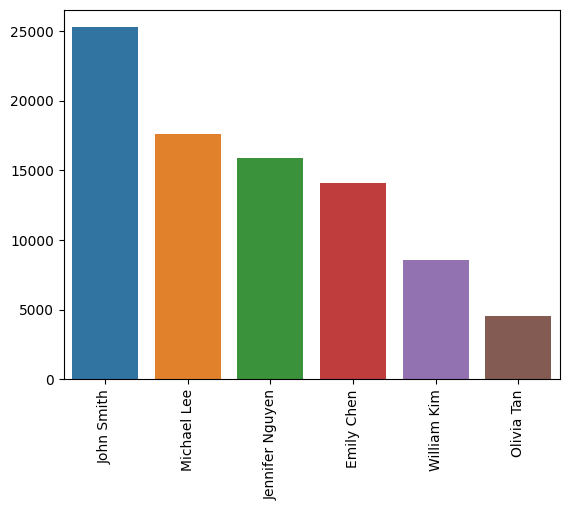

In [25]:
counts = CS_data["Manager"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=90)
plt.show()

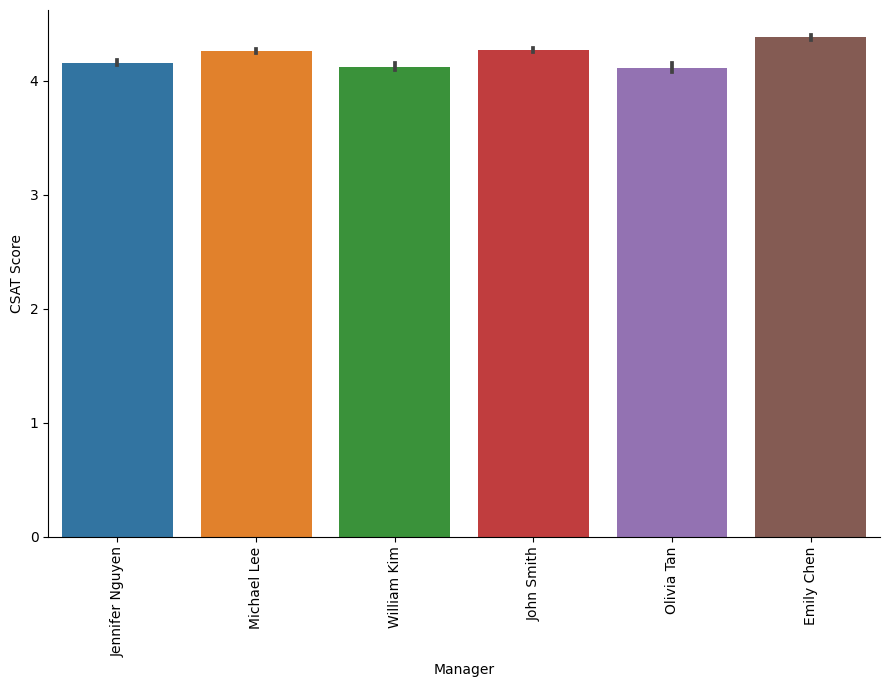

In [26]:
sns.catplot(data=CS_data, x="Manager", y="CSAT Score", kind="bar", height=6, aspect=1.5)
plt.xticks(rotation=90)
plt.show()

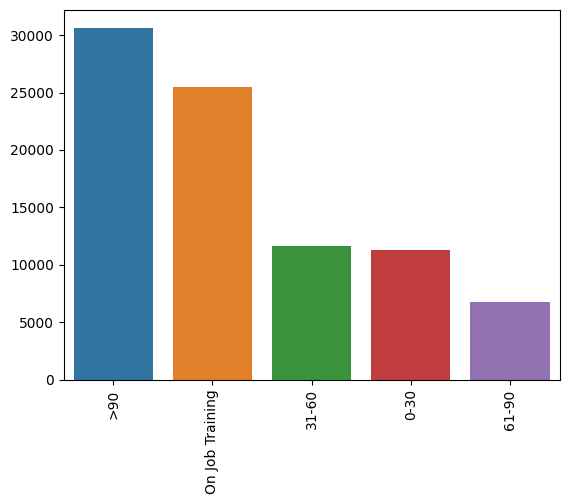

In [27]:
counts = CS_data["Tenure Bucket"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=90)
plt.show()

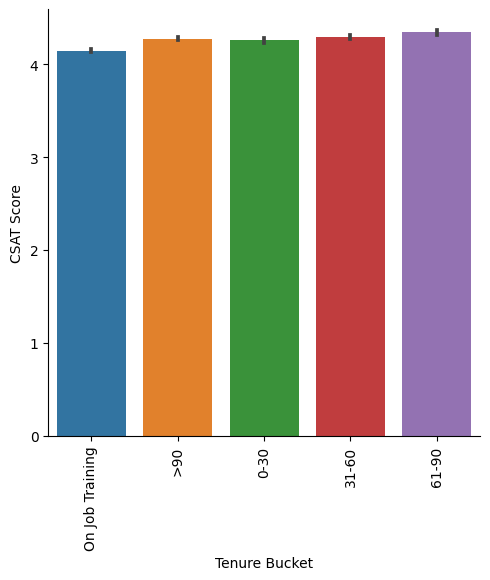

In [28]:
sns.catplot(data=CS_data, x="Tenure Bucket", y="CSAT Score", kind="bar")
plt.xticks(rotation=90)
plt.show()

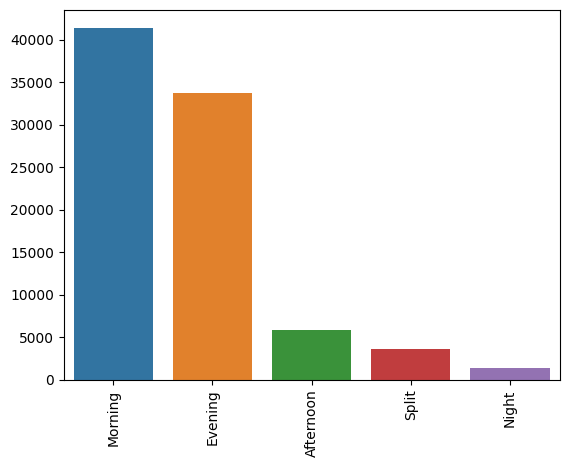

In [29]:
counts = CS_data["Agent Shift"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=90)
plt.show()

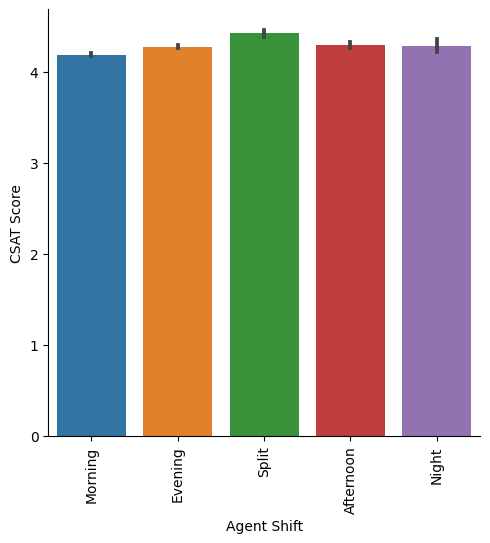

In [30]:
sns.catplot(data=CS_data, x="Agent Shift", y="CSAT Score", kind="bar")
plt.xticks(rotation=90)
plt.show()

### 4. Где целесообразно, проведите укрупнение категорий, путем объединения разных значений в столбце.

In [31]:
CS_data["Customer Remarks New"] = (CS_data["Customer Remarks"].str.len() > 3).astype(int)


In [32]:
CS_data["Is_order"] = (CS_data["Order_id"].isna()).astype(int)


In [33]:
CS_data.loc[~CS_data["Sub-category"].isin([
    "Reverse Pickup Enquiry", "Return request", "Delayed", "Order status enquiry", 
    "Installation/demo", "Fraudulent User", "Product Specific Information"
    ]), "Sub-category"] = "Other"

In [34]:
CS_data["Sub-category"].value_counts()

Other                           28872
Reverse Pickup Enquiry          22389
Return request                   8523
Delayed                          7388
Order status enquiry             6922
Installation/demo                4116
Fraudulent User                  4108
Product Specific Information     3589
Name: Sub-category, dtype: int64

In [35]:
CS_data.groupby(["Agent_name"]).agg({'Agent_name': 'count'})


,Agent_name
Agent_name,
Aaron Edwards,93
Aaron Romero,59
Abigail Gonzalez,25
Adam Barnett,56
Adam Hammond,60
...,...
Yesenia Bowers,50
Zachary Collins,75
Zachary Ford,62


In [36]:
CS_data.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,...,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Customer Remarks New,Is_order
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Other,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,...,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,0,0
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,...,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,0,0
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,...,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,0,0
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,...,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,0,0
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Other,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,...,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,0,0


In [37]:
CS_data.groupby(["Supervisor"]).agg({'Agent_name': 'nunique'})

,Agent_name
Supervisor,
Abigail Suzuki,38
Aiden Patel,41
Alexander Tanaka,15
Amelia Tanaka,19
Austin Johnson,29
Ava Wong,70
Brayden Wong,45
Carter Park,64
Charlotte Suzuki,22


### 5. Добавьте к датасету новый столбец, содержащий агрегированную информацию, которая предположительно будет полезна для моделирования целевой переменной.

In [38]:
CS_data['Sups_no_agents'] = CS_data.groupby(["Supervisor"])["Agent_name"].transform('nunique')


### 6. Заполните отсутствующие значения в датасете.


In [39]:
CS_data['Product_category'] = CS_data['Product_category'].fillna('unknown')


In [40]:
CS_data['connected_handling_time'] = CS_data['connected_handling_time'].fillna('0')


### 7. На примере датасета Титаник проведите преобразование категориальных переменных разных шкал в численные.


In [41]:
from sklearn.preprocessing import LabelEncoder
LE_sex = LabelEncoder()
T_data.Sex = LE_sex.fit_transform(T_data.Sex)

In [42]:
T_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,third,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,first,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,third,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,first,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,third,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [43]:
T_data.Pclass.replace({
    'first': 1, 'second': 2, 'third': 3
}, inplace=True)

T_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [44]:
from sklearn.preprocessing import OneHotEncoder
OH_embarked = OneHotEncoder(sparse_output=False)
OH_embarked.fit_transform(T_data[['Embarked']])

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [45]:
OH_embarked.get_feature_names_out(['Embarked'])

array(['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan'],
      dtype=object)

In [46]:
dummies = pd.DataFrame(OH_embarked.fit_transform(T_data[['Embarked']]),
                       columns=OH_embarked.get_feature_names_out(['Embarked']), 
                       index = T_data.index)

dummies.head()

,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0


In [47]:
T_dummies = pd.concat([T_data, dummies]).drop(["Embarked"], axis=1)
T_dummies.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",1.0,22.0,1.0,0.0,A/5 21171,7.2500,NaN,NaN,NaN,NaN,NaN
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1.0,0.0,PC 17599,71.2833,C85,NaN,NaN,NaN,NaN
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",0.0,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,NaN,NaN,NaN,NaN
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1.0,0.0,113803,53.1000,C123,NaN,NaN,NaN,NaN
4,5.0,0.0,3.0,"Allen, Mr. William Henry",1.0,35.0,0.0,0.0,373450,8.0500,NaN,NaN,NaN,NaN,NaN


### 8. В датасете Customer support удалите лишние столбцы и преобразуйте все категориальные переменные через get_dummies()


In [48]:
CS_dropped = CS_data.drop([
    "Unique id",
    "Sub-category",
    "Customer Remarks",
    "Customer_City", 
    "Agent_name", 
    "Supervisor",
    "Order_id",
    "order_date_time",
    "Issue_reported at",
    "issue_responded",
    "Survey_response_Date",
    "Item_price",

], axis=1)

In [49]:
CS_dropped.head()

,channel_name,category,Product_category,connected_handling_time,Manager,Tenure Bucket,Agent Shift,CSAT Score,Customer Remarks New,Is_order,Sups_no_agents
0,Outcall,Product Queries,unknown,0,Jennifer Nguyen,On Job Training,Morning,5,0,0,41
1,Outcall,Product Queries,unknown,0,Michael Lee,>90,Morning,5,0,0,17
2,Inbound,Order Related,unknown,0,William Kim,On Job Training,Evening,5,0,0,46
3,Inbound,Returns,unknown,0,John Smith,>90,Evening,5,0,0,28
4,Inbound,Cancellation,unknown,0,Michael Lee,0-30,Morning,5,0,0,29


In [50]:
CS_dropped.describe(include="all")

,channel_name,category,Product_category,connected_handling_time,Manager,Tenure Bucket,Agent Shift,CSAT Score,Customer Remarks New,Is_order,Sups_no_agents
count,85907,85907,85907,85907,85907,85907,85907,85907.000000,85907.000000,85907.000000,85907.000000
unique,3,12,10,212,6,5,5,NaN,NaN,NaN,NaN
top,Inbound,Returns,unknown,0,John Smith,>90,Morning,NaN,NaN,NaN,NaN
freq,68142,44097,68711,85665,25261,30660,41426,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.242157,0.319171,0.212230,41.358690
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.378903,0.466158,0.408889,15.862947
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,5.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,0.000000,0.000000,29.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,0.000000,0.000000,41.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,1.000000,0.000000,55.000000


In [51]:
CS_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   channel_name             85907 non-null  object
 1   category                 85907 non-null  object
 2   Product_category         85907 non-null  object
 3   connected_handling_time  85907 non-null  object
 4   Manager                  85907 non-null  object
 5   Tenure Bucket            85907 non-null  object
 6   Agent Shift              85907 non-null  object
 7   CSAT Score               85907 non-null  int64 
 8   Customer Remarks New     85907 non-null  int64 
 9   Is_order                 85907 non-null  int64 
 10  Sups_no_agents           85907 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 7.2+ MB


In [52]:
CS_dummies = pd.get_dummies(CS_dropped)
CS_dummies.head()

,CSAT Score,Customer Remarks New,Is_order,Sups_no_agents,channel_name_Email,channel_name_Inbound,channel_name_Outcall,category_App/website,category_Cancellation,category_Feedback,...,Tenure Bucket_0-30,Tenure Bucket_31-60,Tenure Bucket_61-90,Tenure Bucket_>90,Tenure Bucket_On Job Training,Agent Shift_Afternoon,Agent Shift_Evening,Agent Shift_Morning,Agent Shift_Night,Agent Shift_Split
0,5,0,0,41,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,5,0,0,17,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,5,0,0,46,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,5,0,0,28,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,5,0,0,29,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0


# Задания для самостоятельной работы

### 1. Постройте визуализацию распределения признаков и совместного распределения признаков и целевой переменной с помощью тепловых карт. Попробуйте использовать другие инструменты визуализации.

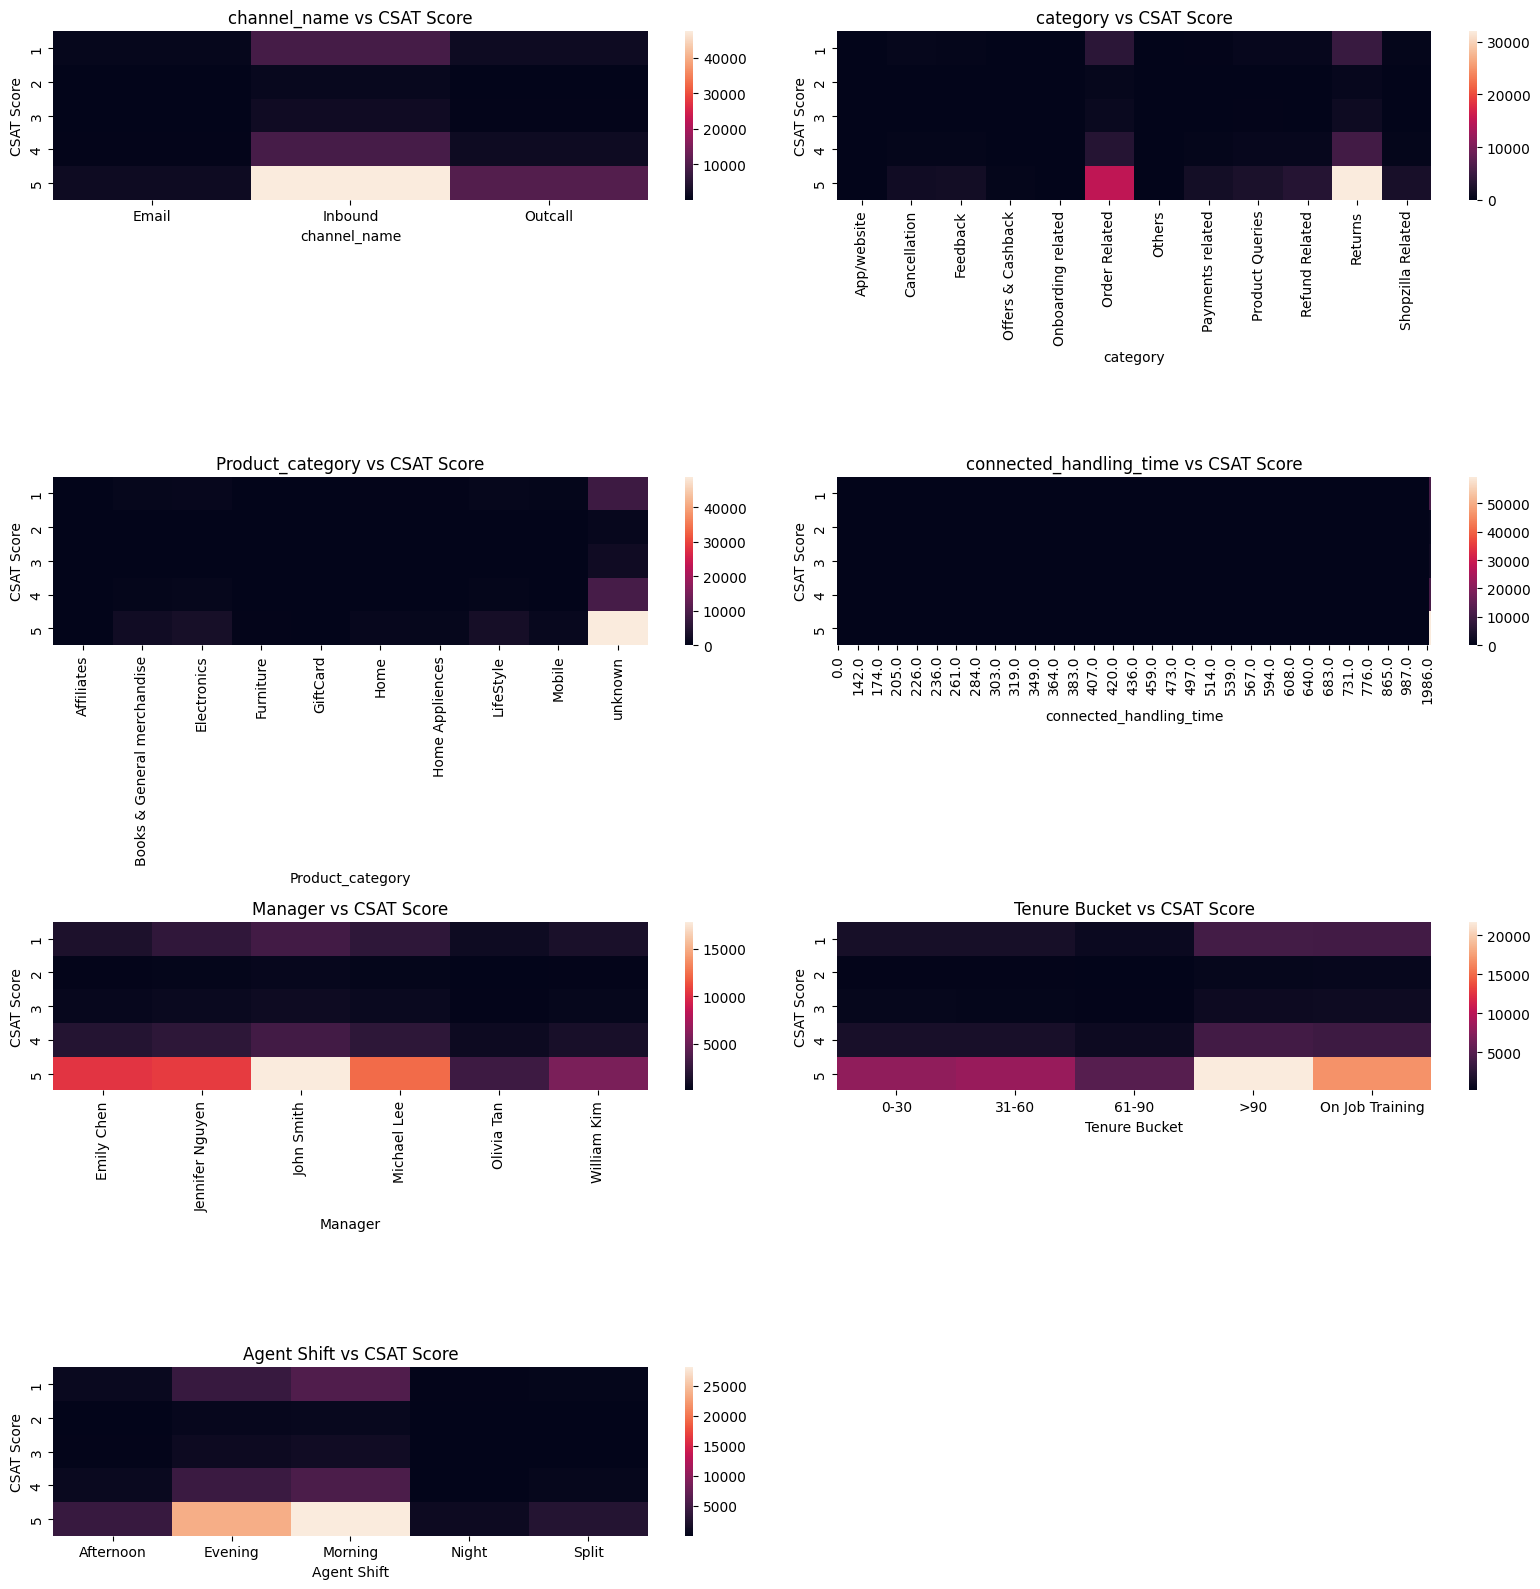

In [53]:
categorical_columns = ['channel_name', 'category', 'Product_category', 
                       'connected_handling_time', 'Manager', 'Tenure Bucket', 
                       'Agent Shift']

target = 'CSAT Score'

n_cols = 2
n_rows = (len(categorical_columns) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))

for i, col in enumerate(categorical_columns):
    row, col_pos = divmod(i, n_cols)
    ax = axes[row][col_pos] if n_rows > 1 else axes[col_pos]

    pivot = CS_dropped.pivot_table(index=target, columns=col, 
                           values='Customer Remarks New', aggfunc='count', fill_value=0)

    sns.heatmap(pivot, annot=False, ax=ax)
    ax.set_title(f'{col} vs {target}')

if len(categorical_columns) % n_cols != 0:
    fig.delaxes(axes[-1][-1])

plt.tight_layout()
plt.show()


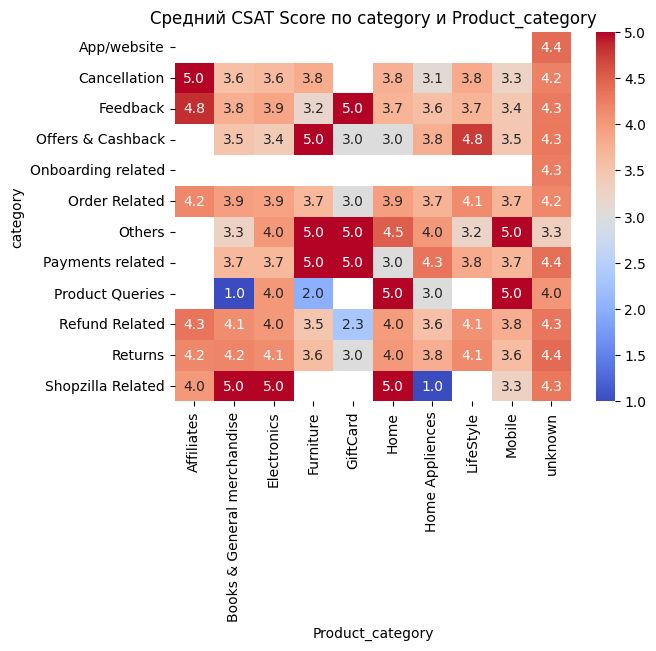

In [54]:
pivot = CS_dropped.pivot_table(values='CSAT Score',
                       index='category',
                       columns='Product_category',
                       aggfunc='mean')

sns.heatmap(pivot, annot=True, fmt=".1f", cmap='coolwarm')
plt.title("Средний CSAT Score по category и Product_category")
plt.show()


### 2 - 3. Постройте на получившимся датасете Customer support модель дерева решений и проанализируйте важность признаков. Сделайте вывод об адекватности наших предположений. Разбейте датасет на тестовую и обучающую выборки и преобразуйте обе подвыборки. Тестовую нужно преобразовывать точно также, как и обучающую (с теми же параметрами).

In [55]:
CS_dummies = pd.get_dummies(CS_dropped)
CS_dummies.head()

,CSAT Score,Customer Remarks New,Is_order,Sups_no_agents,channel_name_Email,channel_name_Inbound,channel_name_Outcall,category_App/website,category_Cancellation,category_Feedback,...,Tenure Bucket_0-30,Tenure Bucket_31-60,Tenure Bucket_61-90,Tenure Bucket_>90,Tenure Bucket_On Job Training,Agent Shift_Afternoon,Agent Shift_Evening,Agent Shift_Morning,Agent Shift_Night,Agent Shift_Split
0,5,0,0,41,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,5,0,0,17,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,5,0,0,46,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,5,0,0,28,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,5,0,0,29,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0


              precision    recall  f1-score   support

           1       0.25      0.15      0.19      2246
           2       0.04      0.02      0.02       256
           3       0.02      0.01      0.01       512
           4       0.14      0.05      0.07      2244
           5       0.70      0.88      0.78     11924

    accuracy                           0.63     17182
   macro avg       0.23      0.22      0.22     17182
weighted avg       0.54      0.63      0.58     17182



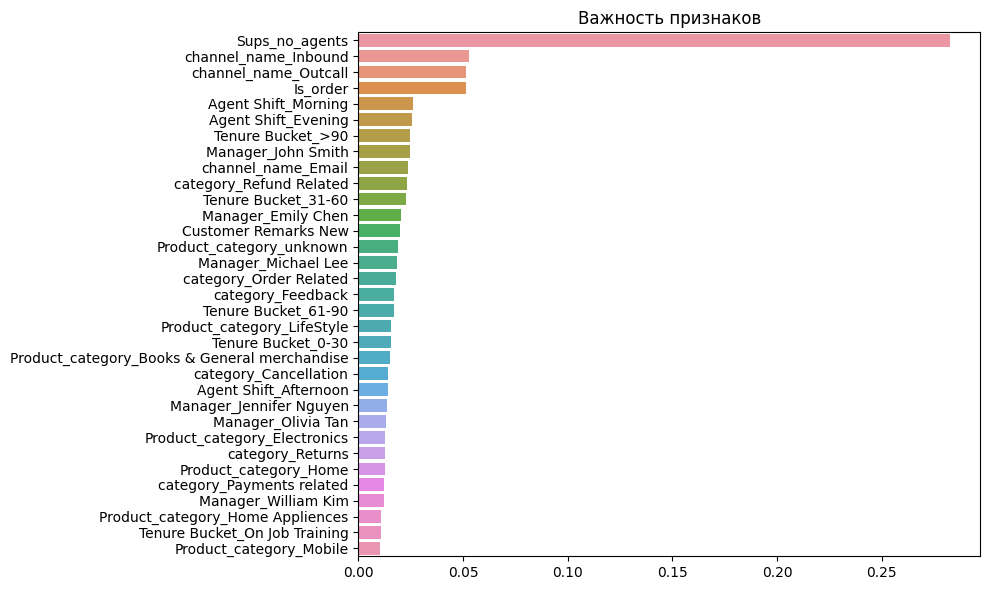

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


X = CS_dummies.drop(target, axis=1)
y = CS_dummies[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances[importances > 0.01].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=importances.index)
plt.title("Важность признаков")
plt.tight_layout()
plt.show()

Модель плохо предсказывает классы, как правило она просто отдает предпочтение самой популярной категории.

Скорее всего нужно использовать другую модель, рассчитанную для работы с несимметричными данными

### 4. Проведите полный анализ на датасете Титаник, включая все необходимые визуализации и выводы.

In [57]:
T_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [58]:
T_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 90.5+ KB


In [59]:
T_data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891.000000,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,NaN,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",NaN,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,0.647587,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,0.477990,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,0.000000,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,0.000000,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,1.000000,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,1.000000,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


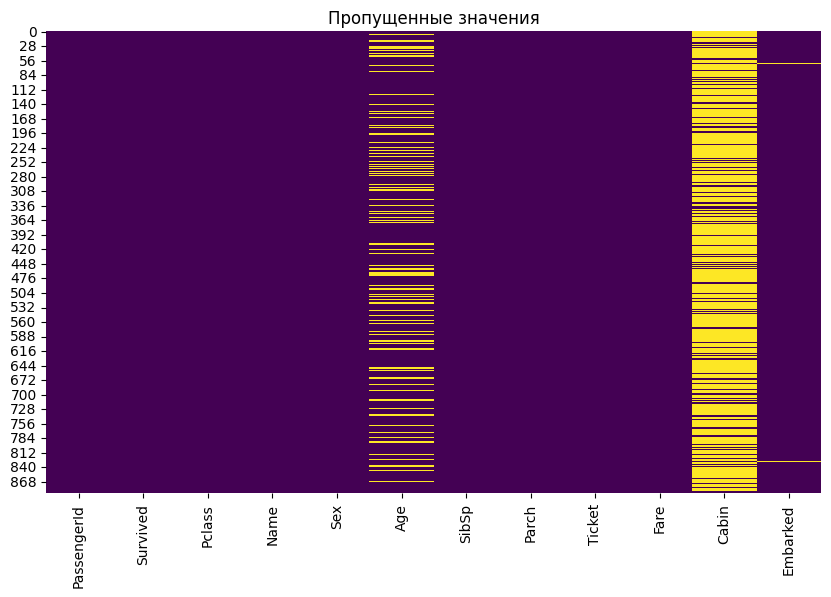

In [60]:
plt.figure(figsize=(10, 6))
sns.heatmap(T_data.isnull(), cbar=False, cmap='viridis')
plt.title('Пропущенные значения')
plt.show()

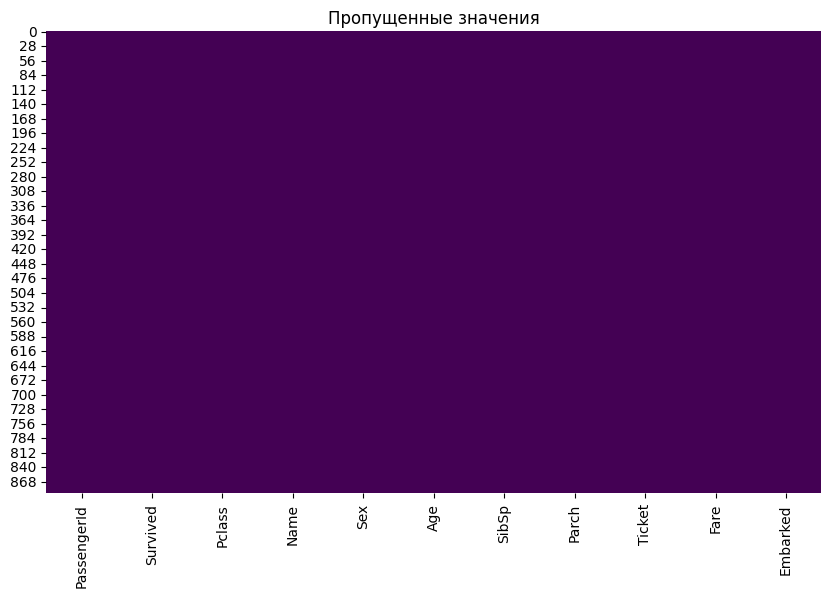

In [61]:
T_data['Age'].fillna(T_data['Age'].median(), inplace=True)
T_data['Embarked'].fillna(T_data['Embarked'].mode()[0], inplace=True)
T_data = T_data.drop('Cabin', axis=1)

plt.figure(figsize=(10, 6))
sns.heatmap(T_data.isnull(), cbar=False, cmap='viridis')
plt.title('Пропущенные значения')
plt.show()

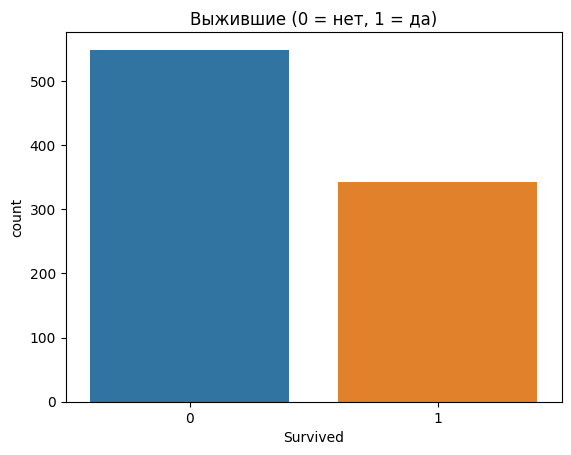

In [62]:
sns.countplot(data=T_data, x='Survived')
plt.title('Выжившие (0 = нет, 1 = да)')
plt.show()

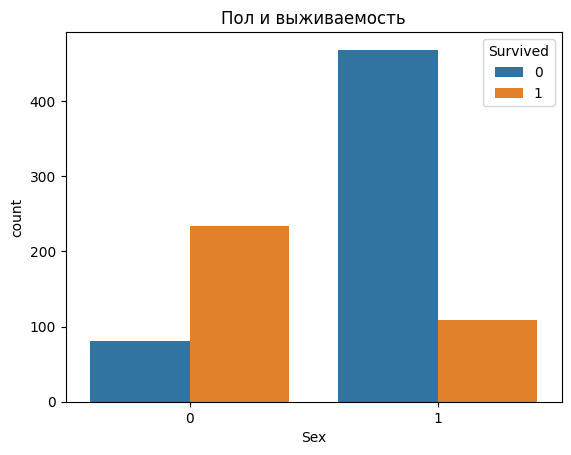

In [63]:
sns.countplot(data=T_data, x='Sex', hue='Survived')
plt.title('Пол и выживаемость')
plt.show()

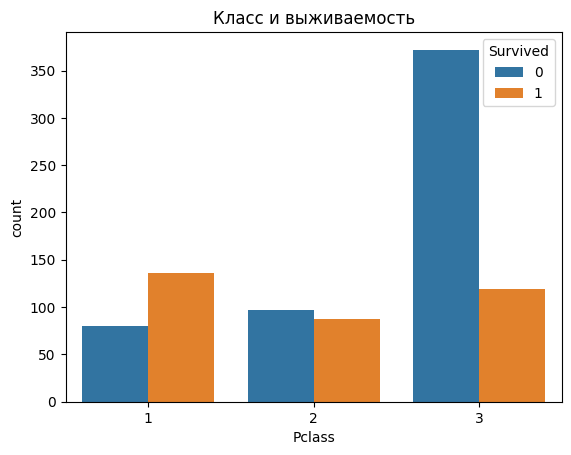

In [64]:
sns.countplot(data=T_data, x='Pclass', hue='Survived')
plt.title('Класс и выживаемость')
plt.show()


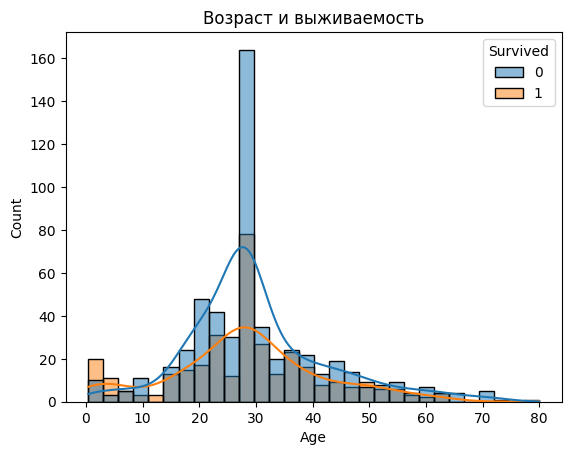

In [65]:
sns.histplot(data=T_data, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Возраст и выживаемость')
plt.show()

/tmp/ipykernel_1763/34581855.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(T_data.corr(), annot=True, cmap='coolwarm')


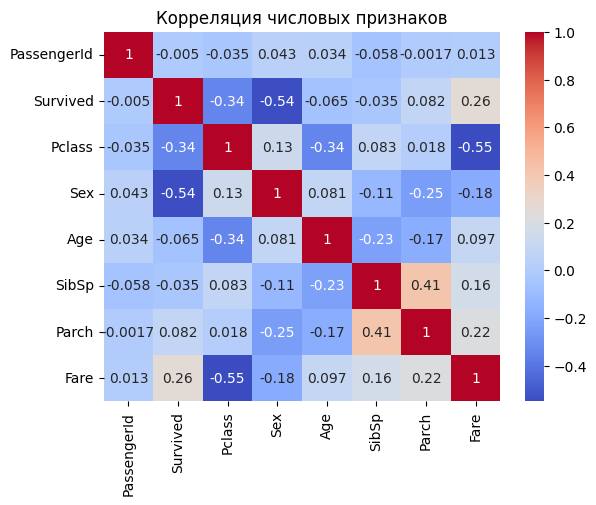

In [66]:
sns.heatmap(T_data.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляция числовых признаков')
plt.show()

In [67]:
T_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


              precision    recall  f1-score   support

           0       0.76      0.94      0.84       110
           1       0.84      0.54      0.65        69

    accuracy                           0.78       179
   macro avg       0.80      0.74      0.75       179
weighted avg       0.79      0.78      0.77       179



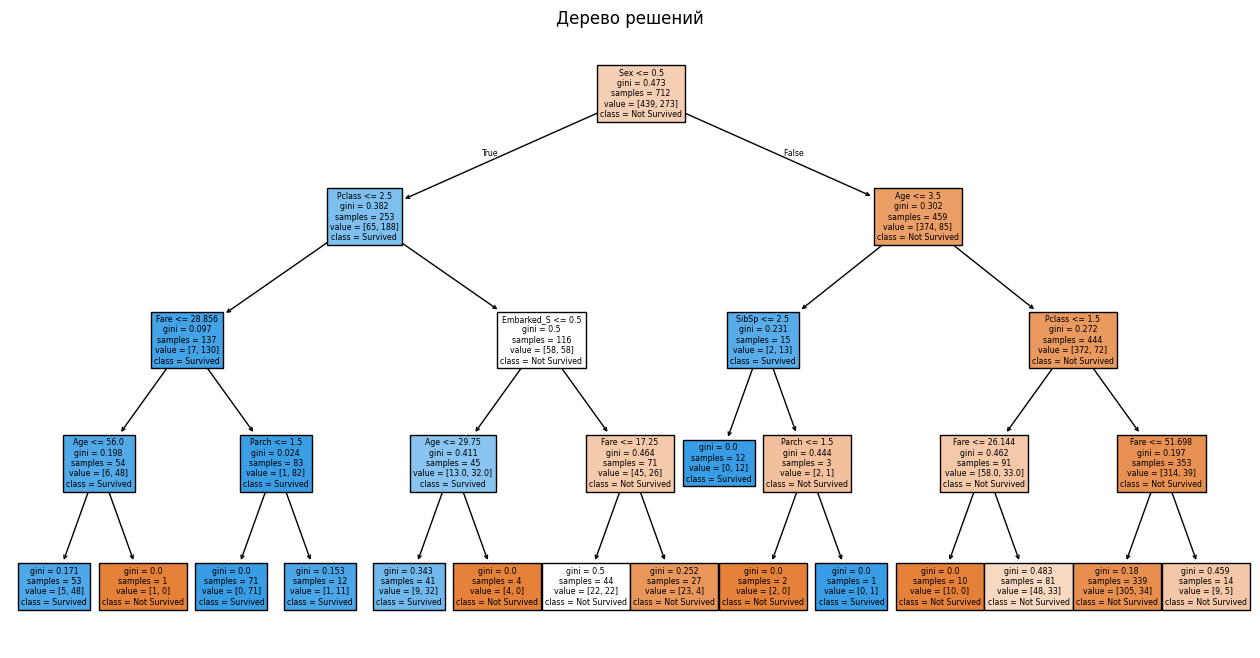

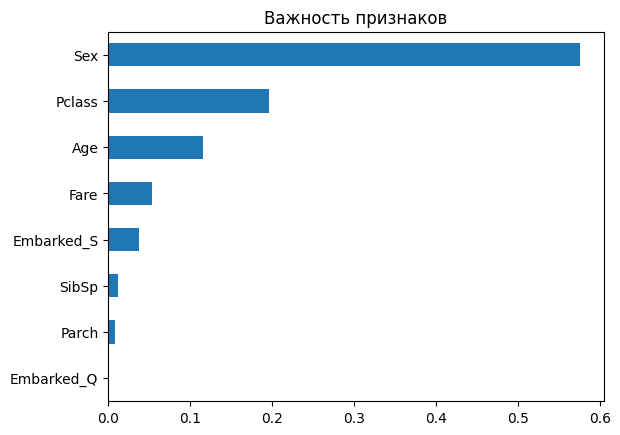

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report


T_data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

df = pd.get_dummies(T_data, columns=['Embarked'], drop_first=True)

X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

plt.figure(figsize=(16, 8))
plot_tree(model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title('Дерево решений')
plt.show()

feat_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)
feat_importance.plot(kind='barh', title='Важность признаков')
plt.show()

# Контрольные вопросы

**Какие основные типы графиков используются для визуализации эмпирического распределения категориальных атрибутов?**  
Столбчатая диаграмма (barplot), круговая диаграмма (pie chart), countplot.

**В чем разница между столбчатой диаграммой и гистограммой?**  
Столбчатая диаграмма применяется к категориальным данным и показывает частоты по категориям, гистограмма используется для числовых данных и отображает распределение по интервалам.

**Какие графики целесообразно использовать для визуализации совместного распределения категориального атрибута и целевой переменной?**  
Кросс-таблица с тепловой картой (heatmap), сгруппированные столбчатые диаграммы (grouped barplot), мозаичный график.

**Какие способы заполнения отсутствующих значений работают с категориальными признаками?**  
Мода (наиболее частое значение), метка "Unknown", модельное предсказание, групповые моды по другим признакам.

**Какие виды категориальных признаков существуют? Чем они определяются?**  
Номинативные — не имеют порядка (например, цвет), порядковые — имеют логический порядок (например, уровень образования).

**Как следует преобразовывать категориальные признаки в численные?**  
Номинативные — через one-hot encoding или label encoding, порядковые — с сохранением порядка через ordinal encoding.
